# GBR_all_data_w_met_sddv3_h99_add_knn_xgboost

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline


import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.neighbors import KNeighborsRegressor as knn
from xgboost import XGBRegressor as xgboost
from sklearn.model_selection import train_test_split
import scipy.stats as sc
import textwrap

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import explained_variance_score
%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import pandas as pd

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import save # figure, show, 
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


### Import data

In [2]:

# mdl = "RFR"
# model_name = "Random Forrest Regressor"


#mdl = "ABR"
#model_name = "AdaBoost Regressor"

mdl = "GBR"
model_name = "Gradient Boosting Regressor"

# mdl = "KNN"
# model_name = "K-Nearest Neighbors Regressor"

# mdl = "XGBR"
# model_name = "XGBoost Regressor"


rs = 0
drive = "D"
data_comp = f"{mdl}_dp1_dbi_si_dry_mask_density_sddv3_mean"

In [3]:
csv_file = r"C:\Users\robot\projects\biomass\collated_zonal_stats\annual_mask\dp1_dbi_si_annual_mask_density_near_met_fire.csv"

## Set output file locations

In [4]:
output = r"C:\Users\robot\projects\biomass\model\{}".format(data_comp)
output_ = os.path.join(output, "plots")

In [5]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)
    
   

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\robot\\projects\\biomass\\model\\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean'

In [6]:
def_path = os.path.join(output_, "DEF")    
if not os.path.isdir(def_path):
    os.mkdir(def_path)
    
r2_path = os.path.join(output_, "R2")    
if not os.path.isdir(r2_path):
    os.mkdir(r2_path)
    
mae_path = os.path.join(output_, "MAE")    
if not os.path.isdir(mae_path):
    os.mkdir(mae_path)
    
rmse_path = os.path.join(output_, "RMSE")    
if not os.path.isdir(rmse_path):
    os.mkdir(rmse_path)
    

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\robot\\projects\\biomass\\model\\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean\\plots\\DEF'

In [8]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
#df2 = df1.copy()

(46800, 411)
['uid', 'site_name_x', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'site_clean', 'mean_f_afsm', 'min_f_afsm', 'max_f_afsm', 'mean_f_afyn', 'min_f_afyn', 'max_f_afyn', 'mean_f_agap', 'min_f_agap', 'max_f_agap', 'mean_f_apos', 'min_f_apos', 'max_f_apos', 'mean_f_ario', 'min_f_ario', 'max_f_ario', 'mean_f_dfsm', 'min_f_dfsm', 'max_f_dfsm', 'mean_f_dfyn', 'min_f_dfyn', 'max_f_dfyn', 'mean_f_dgap', 'min_f_dgap', 'max_f_dgap', 'mean_f_dpos', 'min_f_dpos', 'max_f_dpos', 'mean_f_drio', 'min_f_drio', 'max_f_drio', 'mean_f_lfsm', 'min_f_lfsm', 'max_f_lfsm', 'mean_f_lfyn', 'min_f_lfyn', 'max_f_lfyn', 'mean_f_lgap', 'min_f_lgap', 'max_f_lgap', 'mean_f_lpos', 'min_f_lpos', 'max_f_lpos', 'mean_f_lrio', 'min_f_lrio', 'max_f_lrio', 'site_name_y', 'd

(46800, 411)

In [9]:
# Check for null values in each column
columns_with_nulls = df1.columns[df1.isnull().any()]
columns_with_nulls

Index(['mean_f_afsm', 'min_f_afsm', 'max_f_afsm', 'mean_f_afyn', 'min_f_afyn',
       'max_f_afyn', 'mean_f_agap', 'min_f_agap', 'max_f_agap', 'mean_f_apos',
       'min_f_apos', 'max_f_apos', 'mean_f_ario', 'min_f_ario', 'max_f_ario',
       'mean_f_dfsm', 'min_f_dfsm', 'max_f_dfsm', 'mean_f_dfyn', 'min_f_dfyn',
       'max_f_dfyn', 'mean_f_dgap', 'min_f_dgap', 'max_f_dgap', 'mean_f_dpos',
       'min_f_dpos', 'max_f_dpos', 'mean_f_drio', 'min_f_drio', 'max_f_drio',
       'mean_f_lfsm', 'min_f_lfsm', 'max_f_lfsm', 'mean_f_lfyn', 'min_f_lfyn',
       'max_f_lfyn', 'mean_f_lgap', 'min_f_lgap', 'max_f_lgap', 'mean_f_lpos',
       'min_f_lpos', 'max_f_lpos', 'mean_f_lrio', 'min_f_lrio', 'max_f_lrio',
       'dr_corr', 'ma_corr', 'tx_corr', 'tn_corr', 'rx_corr', 'rn_corr',
       'b1_wfp_min', 'b1_wfp_max', 'b1_wfp_mean', 'b1_wfp_std', 'b1_wfp_med',
       'b1_wfp_p25', 'b1_wfp_p50', 'b1_wfp_p75', 'b1_wfp_p95', 'b1_wfp_p99',
       'wfp_dt', 'wfp_dir', 'wfp_seas', 'b1_wdc_major', 'b1_wdc_

## Fill missing values

In [10]:
# Fill missing values with the minimum value of each column
df1 = df1.apply(lambda col: col.fillna(col.min()), axis=0)

TypeError: '<=' not supported between instances of 'str' and 'float'

In [11]:
# Check for null values in each column
columns_with_nulls = df1.columns[df1.isnull().any()]
columns_with_nulls

Index(['mean_f_afsm', 'min_f_afsm', 'max_f_afsm', 'mean_f_afyn', 'min_f_afyn',
       'max_f_afyn', 'mean_f_agap', 'min_f_agap', 'max_f_agap', 'mean_f_apos',
       'min_f_apos', 'max_f_apos', 'mean_f_ario', 'min_f_ario', 'max_f_ario',
       'mean_f_dfsm', 'min_f_dfsm', 'max_f_dfsm', 'mean_f_dfyn', 'min_f_dfyn',
       'max_f_dfyn', 'mean_f_dgap', 'min_f_dgap', 'max_f_dgap', 'mean_f_dpos',
       'min_f_dpos', 'max_f_dpos', 'mean_f_drio', 'min_f_drio', 'max_f_drio',
       'mean_f_lfsm', 'min_f_lfsm', 'max_f_lfsm', 'mean_f_lfyn', 'min_f_lfyn',
       'max_f_lfyn', 'mean_f_lgap', 'min_f_lgap', 'max_f_lgap', 'mean_f_lpos',
       'min_f_lpos', 'max_f_lpos', 'mean_f_lrio', 'min_f_lrio', 'max_f_lrio',
       'dr_corr', 'ma_corr', 'tx_corr', 'tn_corr', 'rx_corr', 'rn_corr',
       'b1_wfp_min', 'b1_wfp_max', 'b1_wfp_mean', 'b1_wfp_std', 'b1_wfp_med',
       'b1_wfp_p25', 'b1_wfp_p50', 'b1_wfp_p75', 'b1_wfp_p95', 'b1_wfp_p99',
       'wfp_dt', 'wfp_dir', 'wfp_seas', 'b1_wdc_major', 'b1_wdc_

In [12]:
df = df1.rename(columns={'bio_agb_kg1ha': 'target'})

In [13]:
df

,uid,site_name_x,date,lon_gda94,lat_gda94,bio_l_kg1ha,bio_t_kg1ha,bio_b_kg1ha,bio_w_kg1ha,bio_br_kg1ha,...,dbifman_NDGI,dbifman_RI,dbifman_NBR,dbifman_NDII,dbifman_GDVI,dbifman_MSAVI,dbifman_DVI,dbifman_SAVI,dbifman_NDVI,dbifman_MSR
0,82,nt001,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-892193,892193,2252982,-91008,1987000,2950283,1843000,3214161,5118023,7597445
1,82,nt001,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-892193,892193,2252982,-91008,1987000,2950283,1843000,3214161,5118023,7597445
2,82,nt001,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-892193,892193,2252982,-91008,1987000,2950283,1843000,3214161,5118023,7597445
3,82,nt001,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-892193,892193,2252982,-91008,1987000,2950283,1843000,3214161,5118023,7597445
4,82,nt001,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-892193,892193,2252982,-91008,1987000,2950283,1843000,3214161,5118023,7597445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46795,37,cpr03,20240602,130.81,-12.71,24.35,26.48,103.47,336.61,255.25,...,-369588,369588,1762328,-415020,999000,1723507,964000,2081774,4953751,7214355
46796,37,cpr03,20240602,130.81,-12.71,24.35,26.48,103.47,336.61,255.25,...,-369588,369588,1762328,-415020,999000,1723507,964000,2081774,4953751,7214355
46797,37,cpr03,20240602,130.81,-12.71,24.35,26.48,103.47,336.61,255.25,...,-369588,369588,1762328,-415020,999000,1723507,964000,2081774,4953751,7214355
46798,37,cpr03,20240602,130.81,-12.71,24.35,26.48,103.47,336.61,255.25,...,-369588,369588,1762328,-415020,999000,1723507,964000,2081774,4953751,7214355


In [14]:
columns_with_nulls = df.columns[df.isnull().any()]
columns_with_nulls

Index(['mean_f_afsm', 'min_f_afsm', 'max_f_afsm', 'mean_f_afyn', 'min_f_afyn',
       'max_f_afyn', 'mean_f_agap', 'min_f_agap', 'max_f_agap', 'mean_f_apos',
       'min_f_apos', 'max_f_apos', 'mean_f_ario', 'min_f_ario', 'max_f_ario',
       'mean_f_dfsm', 'min_f_dfsm', 'max_f_dfsm', 'mean_f_dfyn', 'min_f_dfyn',
       'max_f_dfyn', 'mean_f_dgap', 'min_f_dgap', 'max_f_dgap', 'mean_f_dpos',
       'min_f_dpos', 'max_f_dpos', 'mean_f_drio', 'min_f_drio', 'max_f_drio',
       'mean_f_lfsm', 'min_f_lfsm', 'max_f_lfsm', 'mean_f_lfyn', 'min_f_lfyn',
       'max_f_lfyn', 'mean_f_lgap', 'min_f_lgap', 'max_f_lgap', 'mean_f_lpos',
       'min_f_lpos', 'max_f_lpos', 'mean_f_lrio', 'min_f_lrio', 'max_f_lrio',
       'dr_corr', 'ma_corr', 'tx_corr', 'tn_corr', 'rx_corr', 'rn_corr',
       'b1_wfp_min', 'b1_wfp_max', 'b1_wfp_mean', 'b1_wfp_std', 'b1_wfp_med',
       'b1_wfp_p25', 'b1_wfp_p50', 'b1_wfp_p75', 'b1_wfp_p95', 'b1_wfp_p99',
       'wfp_dt', 'wfp_dir', 'wfp_seas', 'b1_wdc_major', 'b1_wdc_

In [15]:
print(df.columns.tolist())

['uid', 'site_name_x', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'target', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'site_clean', 'mean_f_afsm', 'min_f_afsm', 'max_f_afsm', 'mean_f_afyn', 'min_f_afyn', 'max_f_afyn', 'mean_f_agap', 'min_f_agap', 'max_f_agap', 'mean_f_apos', 'min_f_apos', 'max_f_apos', 'mean_f_ario', 'min_f_ario', 'max_f_ario', 'mean_f_dfsm', 'min_f_dfsm', 'max_f_dfsm', 'mean_f_dfyn', 'min_f_dfyn', 'max_f_dfyn', 'mean_f_dgap', 'min_f_dgap', 'max_f_dgap', 'mean_f_dpos', 'min_f_dpos', 'max_f_dpos', 'mean_f_drio', 'min_f_drio', 'max_f_drio', 'mean_f_lfsm', 'min_f_lfsm', 'max_f_lfsm', 'mean_f_lfyn', 'min_f_lfyn', 'max_f_lfyn', 'mean_f_lgap', 'min_f_lgap', 'max_f_lgap', 'mean_f_lpos', 'min_f_lpos', 'max_f_lpos', 'mean_f_lrio', 'min_f_lrio', 'max_f_lrio', 'site_name_y', 'dr_asav', 'dr_asmd', 

## Main only

In [21]:
#main major and h99 
var_ = data_comp

df_columns = list(df.columns)
keep = ['site_clean', "target", 
        "mean", 
        #"major", 
        #"p99", 
        "GNDVI", "MSR", "NBR", "_NDVI", "CVI", "GDVI", "GSAVI",
        "NDGI","RI", "NDII", "MSAVI", "SAVI"
       'r32', 'r42', 'r43',
         'r52', 'r53', 'r54', 'r62', 'r63', 'r64', 'r65',
         #'dr_', 'ma_', 'tx_', 'tn_', 'rx_', 'rn_'
        ]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]
print(df2.shape)

(200, 45)


In [22]:
# drop fdc - no need for this data

# Identify columns that contain "fdc" in their column names
columns_to_drop = df2.columns[df2.columns.str.contains("fdc", case=False)]

# Drop these columns
df2 = df2.drop(columns=columns_to_drop)

In [23]:
columns_to_drop

Index([], dtype='object')

In [24]:
df2.shape

(200, 45)

In [25]:
print(df2.columns.tolist())

['target', 'site_clean', 'mean_f_afsm', 'mean_f_apos', 'mean_f_ario', 'mean_f_dfsm', 'mean_f_dpos', 'mean_f_drio', 'mean_f_lfsm', 'mean_f_lpos', 'mean_f_lrio', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_r42', 'dbifmdry_r43', 'dbifmdry_r52', 'dbifmdry_r53', 'dbifmdry_r54', 'dbifmdry_r62', 'dbifmdry_r63', 'dbifmdry_r64', 'dbifmdry_r65', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [26]:
df_columns = list(df2.columns)
keep = ['major']
       
classified_cols = [ele for ele in df_columns for x in keep if x in ele]
print(classified_cols)

[]


In [21]:
# df2 = df2[['site_clean', 'target', 'dbifmdry_r42', 'dbifmdry_r43', 'dbifmdry_r52', 'dbifmdry_r53', 'dbifmdry_r54', 'dbifmdry_r62', 'dbifmdry_r63', 'dbifmdry_r64', 'dbifmdry_r65', 'dbifmdry_NDVI',
# 
#  ]]
# print(df2.columns.tolist())
# var_ = "_ratio_NDVI_only_test"

In [22]:
df2.columns.tolist()

['site_clean',
 'target',
 'b1_wfp_dry_mean',
 'b1_hsd_mean',
 'b1_hmc_mean',
 'b1_hcv_mean',
 'b1_h99_mean',
 'b1_ccw_dry_mean',
 'b1_dp1fm_dry_mean',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_r42',
 'dbifmdry_r43',
 'dbifmdry_r52',
 'dbifmdry_r53',
 'dbifmdry_r54',
 'dbifmdry_r62',
 'dbifmdry_r63',
 'dbifmdry_r64',
 'dbifmdry_r65',
 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']

### Logical selection

In [23]:
# Check for duplicate columns and print them
duplicate_columns = df2.columns[df2.columns.duplicated()]

if duplicate_columns.any():
    print("Duplicate columns found:")
    for col in duplicate_columns:
        print(col)
else:
    print("No duplicate columns found.")

No duplicate columns found.


## Remove site values which seem like outliers

Detect outliers using Z score on all columns including Target


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_clean         200 non-null    object 
 1   target             200 non-null    float64
 2   b1_wfp_dry_mean    200 non-null    float64
 3   b1_hsd_mean        200 non-null    float64
 4   b1_hmc_mean        200 non-null    float64
 5   b1_hcv_mean        200 non-null    float64
 6   b1_h99_mean        200 non-null    float64
 7   b1_ccw_dry_mean    200 non-null    float64
 8   b1_dp1fm_dry_mean  200 non-null    float64
 9   b2_dp1fm_dry_mean  200 non-null    float64
 10  b3_dp1fm_dry_mean  200 non-null    float64
 11  b2_dbifm_dry_mean  200 non-null    float64
 12  b3_dbifm_dry_mean  200 non-null    float64
 13  b4_dbifm_dry_mean  200 non-null    float64
 14  b5_dbifm_dry_mean  200 non-null    float64
 15  b6_dbifm_dry_mean  200 non-null    float64
 16  dbifmdry_r42       200 non

## Detect Z score outliers on all columns except target

In [25]:
import pandas as pd
from scipy.stats import zscore
import numpy as np

# Function to detect outliers using Z-score
def detect_outliers(df, target_column):
    # Select only numeric columns except the target column
    numeric_df = df.select_dtypes(include=[np.number]).drop(columns=[target_column])
    
    # Calculate the Z-scores
    z_scores = np.abs(zscore(numeric_df))
    
    # Identify rows with Z-scores greater than 3 in any column
    outliers = (z_scores > 3).any(axis=1)
    
    return outliers

# Assuming df2 is your DataFrame with mixed data types and 'target' is the target column
df = df2.copy()

# Define the target column
target_column = 'target'  # Replace 'target' with the name of your target column

# Detect outliers
outliers = detect_outliers(df, target_column)

# Print the detected outliers
print("Detected Outliers:")
print(df[outliers])

# If you want to highlight these outliers in the original DataFrame
df_highlighted = df.copy()

for col in df.select_dtypes(include=[np.number]).drop(columns=[target_column]).columns:
    df_highlighted[col + '_outlier'] = np.where(outliers, 'Outlier', 'Normal')

print("Original DataFrame with Outliers Highlighted:")
print(df_highlighted)

output_ = os.path.join(output, f"dry_mask_{var_}_not_target_outlier.csv")
df_highlighted.to_csv(output_, index=False)

Detected Outliers:
          site_clean   target  b1_wfp_dry_mean  b1_hsd_mean  b1_hmc_mean  \
5         amg08.2012 29521.80            57.22       103.42       107.59   
20        auv07.2012     0.00             1.00       100.37       100.47   
40         ep01.2012 18757.20            85.08       102.77       107.54   
48        hsf01.2012 25701.69            65.25       102.89       107.15   
50       hshr01.2012 35199.71            72.56       104.43       111.05   
62       legu03.2012     0.00             1.50       101.19       102.74   
76        lit01.2013 25585.07            67.42       105.87       112.95   
84        nt004.2012     0.00            15.22       103.00       103.78   
132  ntamgd0002.2014     0.00             1.00       100.94       101.70   
142  ntastu0005.2016  8402.81            17.06       101.95       103.51   
191        wh03.2012     0.00            16.42       102.00       103.57   
192        wh04.2012     0.00            15.89       102.12       103

In [26]:
# Function to detect outliers using Z-score
def detect_outliers(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate the Z-scores
    z_scores = np.abs(zscore(numeric_df))
    
    # Identify rows with Z-scores greater than 3 in any column
    outliers = (z_scores > 3).any(axis=1)
    
    return outliers

# Assuming df2 is your DataFrame with mixed data types
df = df2.copy()

# Detect outliers
outliers = detect_outliers(df)

# Print the detected outliers
print("Detected Outliers:")
print(df[outliers].site_clean)

# Drop rows that contain outliers
df_cleaned = df[~outliers]

print("Cleaned DataFrame (without outliers):")
df_cleaned

Detected Outliers:
5           amg08.2012
20          auv07.2012
40           ep01.2012
48          hsf01.2012
50         hshr01.2012
62         legu03.2012
76          lit01.2013
84          nt004.2012
132    ntamgd0002.2014
142    ntastu0005.2016
167        site21.2023
191          wh03.2012
192          wh04.2012
Name: site_clean, dtype: object
Cleaned DataFrame (without outliers):


,site_clean,target,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_NDVI,dbifmdry_MSR
0,agb02.2012,0.00,45.89,103.63,107.13,151.32,114.13,68.00,10.67,44.33,...,5566970,47885270,-1538462,1538462,1964774,-383207,1409000,2022182,4405850,6047316
1,amg01.2012,8376.22,44.00,103.88,106.25,169.41,113.93,66.00,1.33,43.67,...,5898277,50775600,-1341991,1341991,2881356,-338983,1438000,2197130,4947937,7201101
2,amg03.2012,0.00,3.33,101.58,103.49,137.70,106.57,6.92,0.67,10.42,...,5460945,58363315,-2629287,2629287,1429988,-1452928,1629000,1787156,3306405,4099401
3,amg05.2012,24670.80,34.83,103.14,105.14,157.61,111.49,54.75,8.75,37.25,...,5793397,47524435,-1173184,1173184,2241024,-539075,1088000,1753382,4957136,7222079
4,amg06.2012,3086.16,29.78,103.02,104.74,163.29,110.91,48.33,5.22,33.78,...,5341797,42394332,-1255729,1255729,2197205,-836979,1094000,1668140,4379863,5995724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,wh07.2012,240.24,2.25,100.94,102.21,140.04,103.96,2.25,35.33,5.75,...,3616564,30388263,-1751216,1751216,-653378,-1646321,1345000,1214483,1991475,2236580
196,wh08.2012,0.00,11.92,102.08,103.29,156.05,107.97,21.25,30.33,19.67,...,4150995,34182549,-1711085,1711085,742810,-791061,1523000,1587738,2626459,3085874
197,wh09.2012,0.00,7.89,100.82,101.59,144.41,103.81,14.22,1.78,15.67,...,4826087,42441388,-1939035,1939035,2065458,-545833,1776000,1952017,3185114,3909535
198,wh13.2012,0.00,6.00,101.01,101.96,131.00,104.01,11.00,21.38,2.50,...,3514137,29196771,-1670989,1670989,1488840,-458342,1218000,1131930,1958131,2194196


In [27]:
df_cleaned

,site_clean,target,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_NDVI,dbifmdry_MSR
0,agb02.2012,0.00,45.89,103.63,107.13,151.32,114.13,68.00,10.67,44.33,...,5566970,47885270,-1538462,1538462,1964774,-383207,1409000,2022182,4405850,6047316
1,amg01.2012,8376.22,44.00,103.88,106.25,169.41,113.93,66.00,1.33,43.67,...,5898277,50775600,-1341991,1341991,2881356,-338983,1438000,2197130,4947937,7201101
2,amg03.2012,0.00,3.33,101.58,103.49,137.70,106.57,6.92,0.67,10.42,...,5460945,58363315,-2629287,2629287,1429988,-1452928,1629000,1787156,3306405,4099401
3,amg05.2012,24670.80,34.83,103.14,105.14,157.61,111.49,54.75,8.75,37.25,...,5793397,47524435,-1173184,1173184,2241024,-539075,1088000,1753382,4957136,7222079
4,amg06.2012,3086.16,29.78,103.02,104.74,163.29,110.91,48.33,5.22,33.78,...,5341797,42394332,-1255729,1255729,2197205,-836979,1094000,1668140,4379863,5995724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,wh07.2012,240.24,2.25,100.94,102.21,140.04,103.96,2.25,35.33,5.75,...,3616564,30388263,-1751216,1751216,-653378,-1646321,1345000,1214483,1991475,2236580
196,wh08.2012,0.00,11.92,102.08,103.29,156.05,107.97,21.25,30.33,19.67,...,4150995,34182549,-1711085,1711085,742810,-791061,1523000,1587738,2626459,3085874
197,wh09.2012,0.00,7.89,100.82,101.59,144.41,103.81,14.22,1.78,15.67,...,4826087,42441388,-1939035,1939035,2065458,-545833,1776000,1952017,3185114,3909535
198,wh13.2012,0.00,6.00,101.01,101.96,131.00,104.01,11.00,21.38,2.50,...,3514137,29196771,-1670989,1670989,1488840,-458342,1218000,1131930,1958131,2194196


In [28]:
df_cleaned.shape

(187, 36)

In [29]:
df2 = df_cleaned

### Set variables to plot

In [30]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [31]:
value_y

'b1_wfp_mean'

In [32]:
df2.shape

(187, 36)

In [33]:
output_int = os.path.join(output, "inter")
if not os.path.isdir(output_int):
    os.mkdir(output_int)


In [34]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_int,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [35]:
df2.shape

(187, 36)

In [36]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [37]:
print(column_list[3:])
print(column_list[1:2])

['b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_r42', 'dbifmdry_r43', 'dbifmdry_r52', 'dbifmdry_r53', 'dbifmdry_r54', 'dbifmdry_r62', 'dbifmdry_r63', 'dbifmdry_r64', 'dbifmdry_r65', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']
['target']


### One-Hot Encoding (for Tree-based Models)

In [38]:
# add columns that contain class data n17
classified_cols

[]

In [39]:
df2.columns

Index(['site_clean', 'target', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean',
       'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dp1fm_dry_mean',
       'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean',
       'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean',
       'b6_dbifm_dry_mean', 'dbifmdry_r42', 'dbifmdry_r43', 'dbifmdry_r52',
       'dbifmdry_r53', 'dbifmdry_r54', 'dbifmdry_r62', 'dbifmdry_r63',
       'dbifmdry_r64', 'dbifmdry_r65', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI',
       'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR',
       'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_NDVI',
       'dbifmdry_MSR'],
      dtype='object')

In [40]:
for i in classified_cols:
    df2 = pd.get_dummies(df2, columns=[i], prefix=f'{i}_en')

In [41]:
#df_encoded
df2

,site_clean,target,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_NDVI,dbifmdry_MSR
0,agb02.2012,0.00,45.89,103.63,107.13,151.32,114.13,68.00,10.67,44.33,...,5566970,47885270,-1538462,1538462,1964774,-383207,1409000,2022182,4405850,6047316
1,amg01.2012,8376.22,44.00,103.88,106.25,169.41,113.93,66.00,1.33,43.67,...,5898277,50775600,-1341991,1341991,2881356,-338983,1438000,2197130,4947937,7201101
2,amg03.2012,0.00,3.33,101.58,103.49,137.70,106.57,6.92,0.67,10.42,...,5460945,58363315,-2629287,2629287,1429988,-1452928,1629000,1787156,3306405,4099401
3,amg05.2012,24670.80,34.83,103.14,105.14,157.61,111.49,54.75,8.75,37.25,...,5793397,47524435,-1173184,1173184,2241024,-539075,1088000,1753382,4957136,7222079
4,amg06.2012,3086.16,29.78,103.02,104.74,163.29,110.91,48.33,5.22,33.78,...,5341797,42394332,-1255729,1255729,2197205,-836979,1094000,1668140,4379863,5995724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,wh07.2012,240.24,2.25,100.94,102.21,140.04,103.96,2.25,35.33,5.75,...,3616564,30388263,-1751216,1751216,-653378,-1646321,1345000,1214483,1991475,2236580
196,wh08.2012,0.00,11.92,102.08,103.29,156.05,107.97,21.25,30.33,19.67,...,4150995,34182549,-1711085,1711085,742810,-791061,1523000,1587738,2626459,3085874
197,wh09.2012,0.00,7.89,100.82,101.59,144.41,103.81,14.22,1.78,15.67,...,4826087,42441388,-1939035,1939035,2065458,-545833,1776000,1952017,3185114,3909535
198,wh13.2012,0.00,6.00,101.01,101.96,131.00,104.01,11.00,21.38,2.50,...,3514137,29196771,-1670989,1670989,1488840,-458342,1218000,1131930,1958131,2194196


## Choose which data set to run the models from

In [42]:
df_ml = df2

In [43]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
print(list(df_ml))

['target', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_r42', 'dbifmdry_r43', 'dbifmdry_r52', 'dbifmdry_r53', 'dbifmdry_r54', 'dbifmdry_r62', 'dbifmdry_r63', 'dbifmdry_r64', 'dbifmdry_r65', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [45]:
df_ml.shape

(187, 35)

In [46]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 199
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             187 non-null    float64
 1   b1_wfp_dry_mean    187 non-null    float64
 2   b1_hsd_mean        187 non-null    float64
 3   b1_hmc_mean        187 non-null    float64
 4   b1_hcv_mean        187 non-null    float64
 5   b1_h99_mean        187 non-null    float64
 6   b1_ccw_dry_mean    187 non-null    float64
 7   b1_dp1fm_dry_mean  187 non-null    float64
 8   b2_dp1fm_dry_mean  187 non-null    float64
 9   b3_dp1fm_dry_mean  187 non-null    float64
 10  b2_dbifm_dry_mean  187 non-null    float64
 11  b3_dbifm_dry_mean  187 non-null    float64
 12  b4_dbifm_dry_mean  187 non-null    float64
 13  b5_dbifm_dry_mean  187 non-null    float64
 14  b6_dbifm_dry_mean  187 non-null    float64
 15  dbifmdry_r42       187 non-null    int64  
 16  dbifmdry_r43       187 non

## Reduce level of 0 values is this cell needed?

## Drop AGB numbers which are low

In [47]:
# df2 = df2[df2['target']>0.0]
# #df2 = df2[df2['target']>1000.0]
# df2.shape

In [48]:
# columns_with_nulls = df2.columns[df2.isnull().any()]
# columns_with_nulls

## Drop AGB numbers which are high

In [49]:
# # drop the 7 tern sites that appear to be outliers
# df2 =df2[df2['target'] <= 40000]
# df2.to_csv(os.path.join(output, "{0}_lt_40000.csv".format('target')))
# #df2 =df2[df2['target'] > 40000]
# #df2.value_counts(['site_clean', value_x, value_y])

In [50]:
df_ml.shape

(187, 35)

In [51]:
#no removal
out_df = df_ml
samp = "all_data"

# # due to the number of field sites with no basal collected data is stratified
# out_df = df_ml[df_ml['target']>0.0]
# samp = "no0"
# out_df.to_csv(os.path.join(output, "more_than_0kgha.csv"))
# out_df = df_ml[df_ml['target']>=10.0]
# samp="more_t_10"
# out_df.to_csv(os.path.join(output, "more_than_10kgha.csv"))
# 
# # create a random selection of 0 - based on sample size
# sample_size = 3
# no_0_df = df_ml[df_ml['target']>0.0]
# samp = "no0"
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(sample_size)
# out_df = pd.concat([no_0_df, agb_0])
# out_df.to_csv(os.path.join(output, "ml_df_0_sample_{0}kgha.csv".format(str(sample_size))))
# samp = f"some0_{sample_size}"
# 
# 
# out_df =df_ml[df_ml['target'] <= 40000]
# out_df.to_csv(os.path.join(output, "less_than_40000kgha.csv"))
# samp = "less_t_40"

In [52]:
test = out_df[out_df['target']>40000.0]
test.shape

(0, 35)

## Select the dataset to run the models from

In [53]:
# All variables
df_ml = out_df

# select variables
#df = select_df
df_ml.shape

(187, 35)

 Define if you are using all variabes or selected variables

In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 199
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             187 non-null    float64
 1   b1_wfp_dry_mean    187 non-null    float64
 2   b1_hsd_mean        187 non-null    float64
 3   b1_hmc_mean        187 non-null    float64
 4   b1_hcv_mean        187 non-null    float64
 5   b1_h99_mean        187 non-null    float64
 6   b1_ccw_dry_mean    187 non-null    float64
 7   b1_dp1fm_dry_mean  187 non-null    float64
 8   b2_dp1fm_dry_mean  187 non-null    float64
 9   b3_dp1fm_dry_mean  187 non-null    float64
 10  b2_dbifm_dry_mean  187 non-null    float64
 11  b3_dbifm_dry_mean  187 non-null    float64
 12  b4_dbifm_dry_mean  187 non-null    float64
 13  b5_dbifm_dry_mean  187 non-null    float64
 14  b6_dbifm_dry_mean  187 non-null    float64
 15  dbifmdry_r42       187 non-null    int64  
 16  dbifmdry_r43       187 non

In [55]:
df_ml.dropna(inplace=True)

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 199
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             187 non-null    float64
 1   b1_wfp_dry_mean    187 non-null    float64
 2   b1_hsd_mean        187 non-null    float64
 3   b1_hmc_mean        187 non-null    float64
 4   b1_hcv_mean        187 non-null    float64
 5   b1_h99_mean        187 non-null    float64
 6   b1_ccw_dry_mean    187 non-null    float64
 7   b1_dp1fm_dry_mean  187 non-null    float64
 8   b2_dp1fm_dry_mean  187 non-null    float64
 9   b3_dp1fm_dry_mean  187 non-null    float64
 10  b2_dbifm_dry_mean  187 non-null    float64
 11  b3_dbifm_dry_mean  187 non-null    float64
 12  b4_dbifm_dry_mean  187 non-null    float64
 13  b5_dbifm_dry_mean  187 non-null    float64
 14  b6_dbifm_dry_mean  187 non-null    float64
 15  dbifmdry_r42       187 non-null    int64  
 16  dbifmdry_r43       187 non

In [57]:
df_ml.describe()

,target,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_NDVI,dbifmdry_MSR
count,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,...,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00
mean,6600.97,22.64,102.77,105.19,152.11,110.44,34.69,10.89,25.58,62.04,...,5036584.71,44062876.53,-1640127.78,1640127.78,1591732.42,-718855.29,1414251.34,1809372.90,3697968.03,5027109.81
std,7885.74,18.04,1.36,2.73,9.98,4.81,26.11,10.30,16.84,16.11,...,919816.78,10259510.63,419534.09,419534.09,1465902.28,963395.77,266009.47,533066.52,1225930.38,2273608.00
min,0.00,1.00,100.55,100.86,122.17,101.91,1.00,0.00,0.11,25.67,...,3165382.00,25412028.00,-2629287.00,62735.00,-1410805.00,-2596291.00,852000.00,866176.00,1531438.00,1669087.00
25%,0.00,5.82,101.62,102.97,145.93,106.33,9.39,3.32,10.61,49.33,...,4257238.50,35290076.50,-1938989.50,1338674.00,469229.00,-1458399.50,1216500.00,1396798.00,2653194.50,3123535.00
50%,3668.79,18.67,102.65,104.48,152.80,110.21,31.33,7.33,24.92,59.38,...,5055439.00,43270890.00,-1680672.00,1680672.00,1488840.00,-805076.00,1398000.00,1680773.00,3461818.00,4349057.00
75%,9589.98,37.67,103.79,107.06,158.35,113.95,57.67,17.05,41.78,75.47,...,5826491.50,51814500.00,-1338674.00,1938989.50,2590125.00,-10692.50,1600500.00,2212283.50,4800476.00,6871634.00
max,32025.21,68.22,105.72,112.38,179.98,120.23,87.33,49.62,62.56,94.22,...,6960059.00,68007708.00,-62735.00,2629287.00,5095458.00,1657346.00,2143000.00,3153809.00,6413744.00,11393565.00


# Scatter plots with error

In [58]:
#df_ml.to_csv(, index=False)
df_ml.to_csv(os.path.join(output, "{0}_{1}_{2}_ml_data.csv".format(var_, mdl, samp)), index=False)

In [59]:
df_ml.describe()

,target,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_NDVI,dbifmdry_MSR
count,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,...,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00
mean,6600.97,22.64,102.77,105.19,152.11,110.44,34.69,10.89,25.58,62.04,...,5036584.71,44062876.53,-1640127.78,1640127.78,1591732.42,-718855.29,1414251.34,1809372.90,3697968.03,5027109.81
std,7885.74,18.04,1.36,2.73,9.98,4.81,26.11,10.30,16.84,16.11,...,919816.78,10259510.63,419534.09,419534.09,1465902.28,963395.77,266009.47,533066.52,1225930.38,2273608.00
min,0.00,1.00,100.55,100.86,122.17,101.91,1.00,0.00,0.11,25.67,...,3165382.00,25412028.00,-2629287.00,62735.00,-1410805.00,-2596291.00,852000.00,866176.00,1531438.00,1669087.00
25%,0.00,5.82,101.62,102.97,145.93,106.33,9.39,3.32,10.61,49.33,...,4257238.50,35290076.50,-1938989.50,1338674.00,469229.00,-1458399.50,1216500.00,1396798.00,2653194.50,3123535.00
50%,3668.79,18.67,102.65,104.48,152.80,110.21,31.33,7.33,24.92,59.38,...,5055439.00,43270890.00,-1680672.00,1680672.00,1488840.00,-805076.00,1398000.00,1680773.00,3461818.00,4349057.00
75%,9589.98,37.67,103.79,107.06,158.35,113.95,57.67,17.05,41.78,75.47,...,5826491.50,51814500.00,-1338674.00,1938989.50,2590125.00,-10692.50,1600500.00,2212283.50,4800476.00,6871634.00
max,32025.21,68.22,105.72,112.38,179.98,120.23,87.33,49.62,62.56,94.22,...,6960059.00,68007708.00,-62735.00,2629287.00,5095458.00,1657346.00,2143000.00,3153809.00,6413744.00,11393565.00


In [60]:
# Check for null values
null_values = df_ml.isnull().sum()

In [61]:
null_values

target               0
b1_wfp_dry_mean      0
b1_hsd_mean          0
b1_hmc_mean          0
b1_hcv_mean          0
b1_h99_mean          0
b1_ccw_dry_mean      0
b1_dp1fm_dry_mean    0
b2_dp1fm_dry_mean    0
b3_dp1fm_dry_mean    0
b2_dbifm_dry_mean    0
b3_dbifm_dry_mean    0
b4_dbifm_dry_mean    0
b5_dbifm_dry_mean    0
b6_dbifm_dry_mean    0
dbifmdry_r42         0
dbifmdry_r43         0
dbifmdry_r52         0
dbifmdry_r53         0
dbifmdry_r54         0
dbifmdry_r62         0
dbifmdry_r63         0
dbifmdry_r64         0
dbifmdry_r65         0
dbifmdry_GSAVI       0
dbifmdry_GNDVI       0
dbifmdry_CVI         0
dbifmdry_NDGI        0
dbifmdry_RI          0
dbifmdry_NBR         0
dbifmdry_NDII        0
dbifmdry_GDVI        0
dbifmdry_MSAVI       0
dbifmdry_NDVI        0
dbifmdry_MSR         0
dtype: int64

In [62]:
#df = df_ml

In [63]:
# Function to check if a value is in scientific notation
def is_scientific_notation(value):
    try:
        float_value = float(value)
        return '{:e}'.format(float_value) == value.lower()
    except ValueError:
        return False

# Check for scientific notation in each cell
for column in df_ml.columns:
    for value in df_ml[column]:
        if is_scientific_notation(str(value)):
            print(f"Column {column}: {value} is in scientific notation")

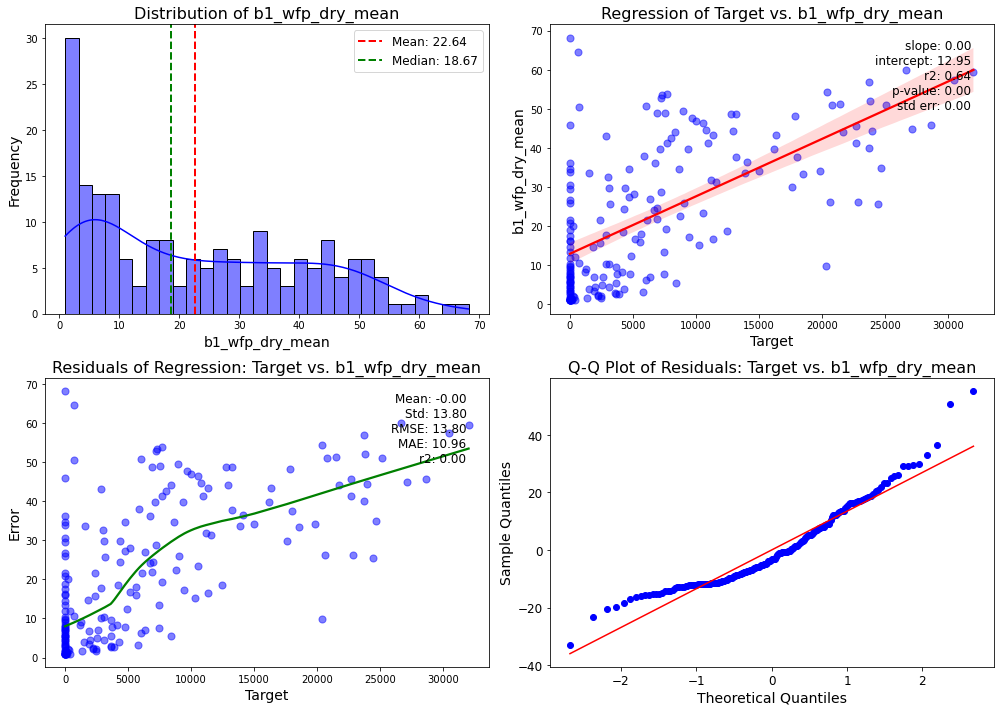

plot:  C:\Users\robot\projects\biomass\model\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean\plots\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean_GBR_b1_wfp_dry_mean_0_combined_plot_tr.JPG


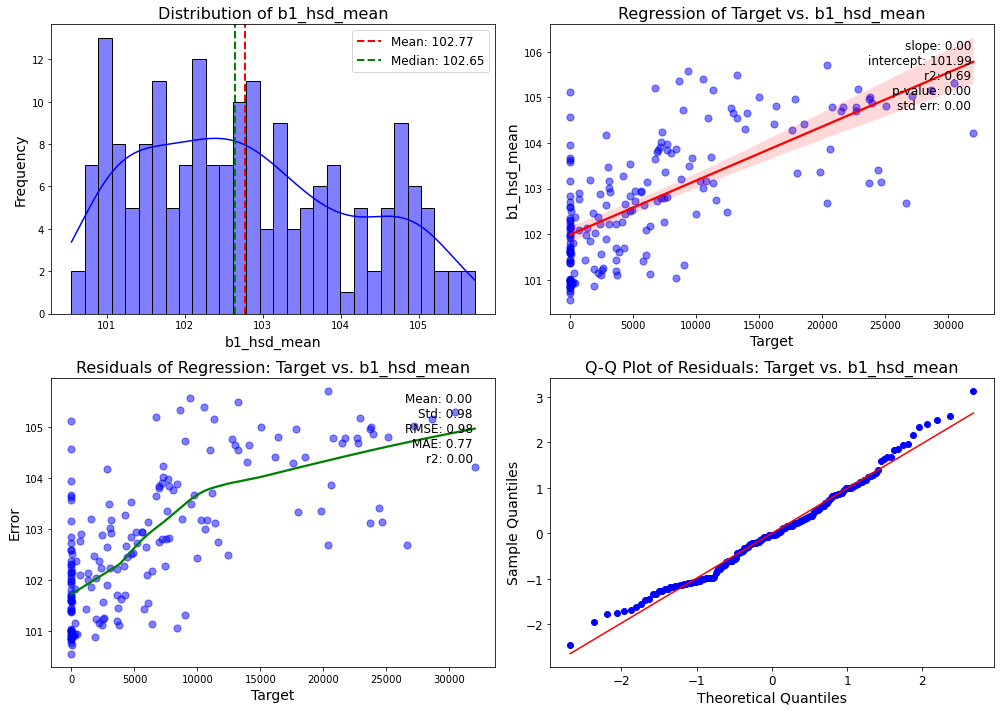

plot:  C:\Users\robot\projects\biomass\model\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean\plots\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean_GBR_b1_hsd_mean_0_combined_plot_tr.JPG


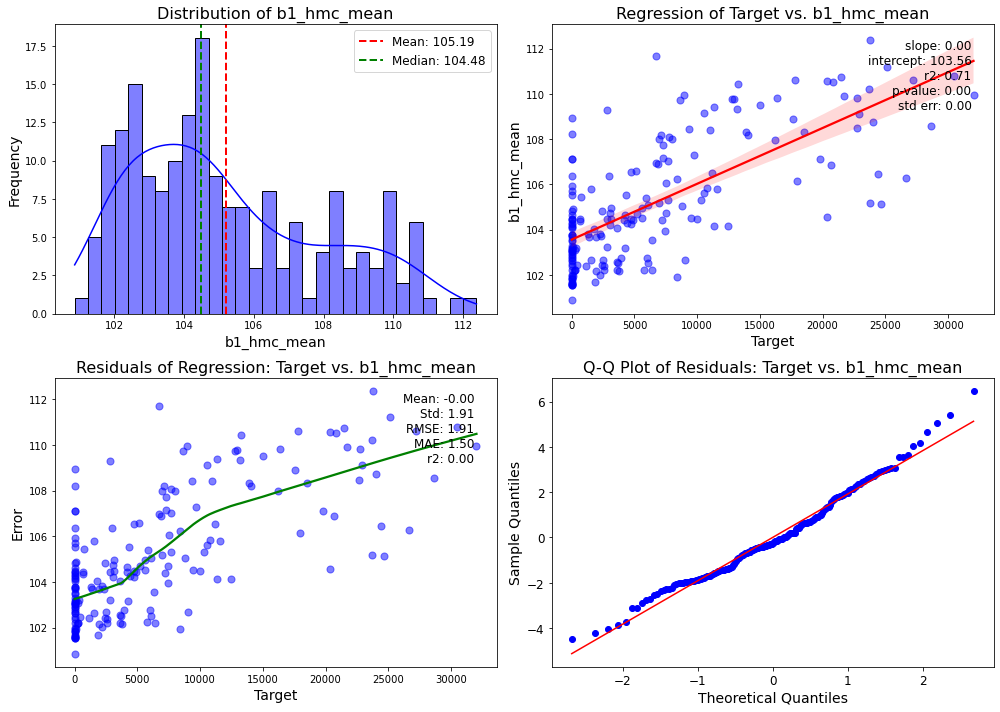

plot:  C:\Users\robot\projects\biomass\model\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean\plots\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean_GBR_b1_hmc_mean_0_combined_plot_tr.JPG


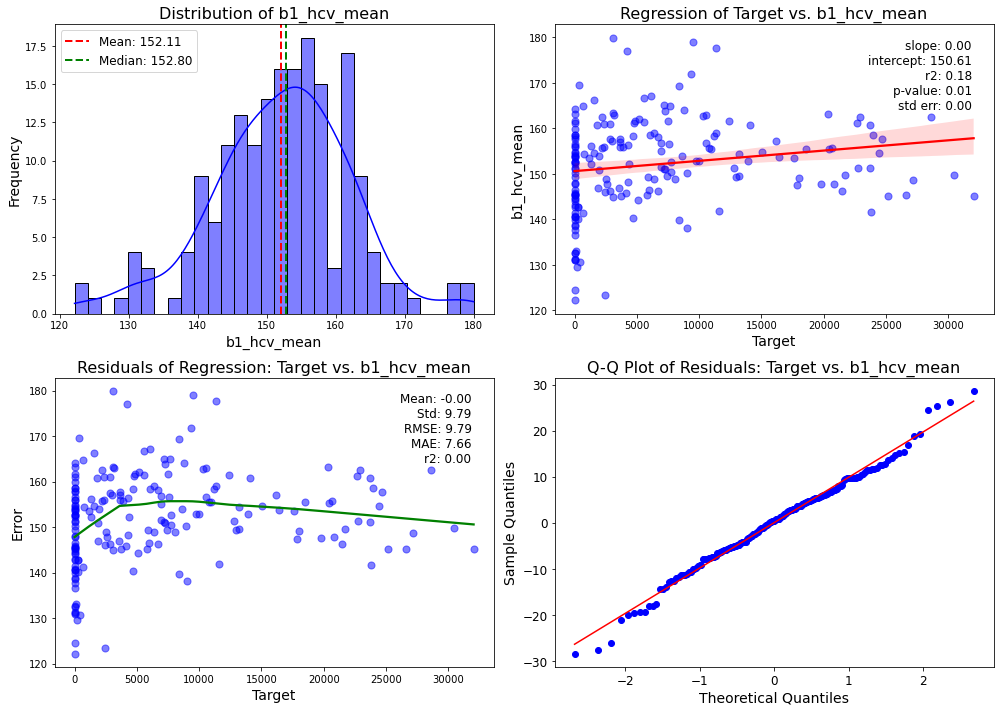

plot:  C:\Users\robot\projects\biomass\model\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean\plots\GBR_dp1_dbi_si_dry_mask_density_sddv3_mean_GBR_b1_hcv_mean_0_combined_plot_tr.JPG


In [ ]:
df = df_ml

def plot_with_mean_median(df, columns):
    for col in columns:
        plt.figure(figsize=(14, 10))

        # Top-left plot: Distribution with mean and median
        plt.subplot(2, 2, 1)
        sns.histplot(df[col], kde=True, color='blue', bins=30)
        
        # Calculate mean and median
        mean = df[col].mean()
        median = df[col].median()
        
        # Plot mean and median as dashed lines
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
        
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.legend(fontsize=12)
        
        # Top-right plot: Regression plot
        value_x = 'target'
        C_value_x = "Target"
        value_y_loop = col

        plt.subplot(2, 2, 2)
        sns.regplot(data=df_ml, x=value_x, y=value_y_loop, line_kws={"color": "red"}, scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'blue'})
        plt.xlabel(C_value_x, fontsize=14)
        plt.ylabel(value_y_loop, fontsize=14)
        plt.title(f"Regression of {C_value_x} vs. {value_y_loop}", fontsize=16)

        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

        # Annotate the stats
        plt.text(0.95, 0.95, f'slope: {slope:.2f}\nintercept: {intercept:.2f}\nr2: {r_value:.2f}\np-value: {p_value:.2f}\nstd err: {std_err:.2f}',
                 transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12)

        # Bottom-left plot: Residuals plot
        plt.subplot(2, 2, 3)
        sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color": "green"}, scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'blue'})
        plt.xlabel(C_value_x, fontsize=14)
        plt.ylabel("Error", fontsize=14)
        plt.title(f"Residuals of Regression: {C_value_x} vs. {value_y_loop}", fontsize=16)

        residuals = df_ml[value_y_loop] - (slope * df_ml[value_x] + intercept)

        # Compute additional residual statistics
        mean_res = np.mean(residuals)
        std_res = np.std(residuals)
        rmse_res = np.sqrt(np.mean(residuals**2))
        mae_res = np.mean(np.abs(residuals))
        r2_res = scipy.stats.linregress(df_ml[value_x], residuals)[2]**2

        # Annotate the residual stats
        plt.text(0.95, 0.95, f'Mean: {mean_res:.2f}\nStd: {std_res:.2f}\nRMSE: {rmse_res:.2f}\nMAE: {mae_res:.2f}\nr2: {r2_res:.2f}',
                 transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12)

        # Bottom-right plot: Q-Q plot
        plt.subplot(2, 2, 4)
        scipy.stats.probplot(residuals, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot of Residuals: {C_value_x} vs. {value_y_loop}", fontsize=16)
        
        # Increase font size for Q-Q plot
        plt.xlabel('Theoretical Quantiles', fontsize=14)
        plt.ylabel('Sample Quantiles', fontsize=14)
        plt.tick_params(axis='both', which='major', labelsize=12)

        plt.tight_layout()

        # Save the plot
        plt_out = os.path.join(output, "plots", f"{var_}_{mdl}_{value_y_loop}_{rs}_combined_plot_tr.JPG")
        plt.savefig(plt_out, dpi=300)
        plt.show()
        print("plot: ", plt_out)
        plt.close()

# Assuming df_ml.columns[1:] contains the columns to be plotted
plot_with_mean_median(df, df_ml.columns[1:])

plt.close('all')

In [ ]:
df = df_ml

def plot_with_mean_median(df, columns):
    for col in columns:
        plt.figure(figsize=(14, 10))

        # Top-left plot: Distribution with mean and median
        plt.subplot(2, 2, 1)
        sns.histplot(df[col], kde=True, color='blue', bins=30)
        
        # Calculate mean and median
        mean = df[col].mean()
        median = df[col].median()
        
        # Plot mean and median as dashed lines
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
        
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.legend(fontsize=12)
        
        # Top-right plot: Regression plot
        value_x = 'target'
        C_value_x = 'Target'
        value_y_loop = col

        plt.subplot(2, 2, 2)
        sns.regplot(data=df_ml, x=value_x, y=value_y_loop, line_kws={"color": "red"}, scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'blue'})
        plt.xlabel(C_value_x, fontsize=14)
        plt.ylabel(value_y_loop, fontsize=14)
        plt.title(f"Regression of {C_value_x} vs. {value_y_loop}", fontsize=16)

        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

        # Annotate the stats
        plt.text(0.95, 0.05, f'slope: {slope:.2f}\nintercept: {intercept:.2f}\nr2: {r_value:.2f}\np-value: {p_value:.2f}\nstd err: {std_err:.2f}',
                 transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', fontsize=12)

        # Bottom-left plot: Residuals plot
        plt.subplot(2, 2, 3)
        sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color": "green"}, scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'blue'})
        plt.xlabel(C_value_x, fontsize=14)
        plt.ylabel("Error", fontsize=14)
        plt.title(f"Residuals of Regression: {C_value_x} vs. {value_y_loop}", fontsize=16)

        residuals = df_ml[value_y_loop] - (slope * df_ml[value_x] + intercept)

        # Compute additional residual statistics
        mean_res = np.mean(residuals)
        std_res = np.std(residuals)
        rmse_res = np.sqrt(np.mean(residuals**2))
        mae_res = np.mean(np.abs(residuals))
        r2_res = scipy.stats.linregress(df_ml[value_x], residuals)[2]**2

        # Annotate the residual stats
        plt.text(0.95, 0.05, f'Mean: {mean_res:.2f}\nStd: {std_res:.2f}\nRMSE: {rmse_res:.2f}\nMAE: {mae_res:.2f}\nr2: {r2_res:.2f}',
                 transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', fontsize=12)

        # Bottom-right plot: Q-Q plot
        plt.subplot(2, 2, 4)
        scipy.stats.probplot(residuals, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot of Residuals: {C_value_x} vs. {value_y_loop}", fontsize=16)
        
        # Increase font size for Q-Q plot
        plt.xlabel('Theoretical Quantiles', fontsize=14)
        plt.ylabel('Sample Quantiles', fontsize=14)
        plt.tick_params(axis='both', which='major', labelsize=12)

        plt.tight_layout()

        # Save the plot
        plt_out = os.path.join(output, "plots", f"{var_}_{mdl}_{value_y_loop}_{rs}_combined_plot_br.JPG")
        plt.savefig(plt_out, dpi=300)
        #plt.show()
        print("plot: ", plt_out)
        plt.close()

# Assuming df_ml.columns[1:] contains the columns to be plotted
plot_with_mean_median(df, df_ml.columns[1:])

plt.close('all')

a# Model

### Split off validation test and train data

In [ ]:
value_x = "target"

In [ ]:
#select random state
#rs = 0

# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = df_ml.iloc[:, 1:].astype('float32')
ydata1 = df_ml[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")
x_validation, x_remaining, y_validation, y_remaining = train_test_split(xdata1, ydata, train_size=0.20, random_state=rs)
x_train, x_test, y_train, y_test = train_test_split(x_remaining, y_remaining, train_size=0.70, random_state=rs)  
print(x_validation.shape, y_validation.shape)
print("remaining.....")
print(x_remaining.shape, y_remaining.shape)
print("-"*50)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

### Plot up Histograms for train and test datasets

In [ ]:
import numpy as np
# output = '.'  # Replace with your actual output directory
# var_ = 'example_var'
# mdl = 'example_model'
# rs = 'example_run'

# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize as needed

# Define the data and titles for each subplot
data = [y_train, y_test, y_validation]
titles = ['Training Data Distribution', 'Testing Data Distribution', 'Validation Data Distribution']

for i, (data_set, title) in enumerate(zip(data, titles)):
    mean = np.mean(data_set)
    median = np.median(data_set)
    
    # Plot histogram with seaborn
    sns.histplot(data_set, kde=True, bins=20, ax=axs[i], color='blue', alpha=0.7)
    
    # Plot mean and median lines
    axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    axs[i].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    
    axs[i].set_title(title, fontsize=16)
    axs[i].set_xlabel('Target', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
    axs[i].legend(fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure
out = os.path.join(output, "plots", f"{var_}_{mdl}_{rs}_train_test_validation_distribution.JPG")
plt.savefig(out, dpi=300)
plt.show()

print("saved to: ", out)

### Parameterise algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

if mdl == "RFR":
    from sklearn.ensemble import RandomForestRegressor as rfr

    # Define model
    model = rfr()
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150, 200, 300],
        'max_depth': [None, 2, 3, 4, 5, 10, 20],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }

elif mdl == "GBR":
    from sklearn.ensemble import GradientBoostingRegressor as gbr

    # Define model
    model = gbr()

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150, 200, 300],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7],
    }

elif mdl == "ABR":
    from sklearn.ensemble import AdaBoostRegressor as abr

    # Define model
    model = abr()

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150, 200, 300],
        'learning_rate': [0.01, 0.1, 1.0],
    }

elif mdl == "XGBR":
    from xgboost import XGBRegressor as xgboost

    # Define model
    model = xgboost()

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }

elif mdl == "KNN":
    from sklearn.neighbors import KNeighborsRegressor as knn

    # Define model
    model = knn()

    # Define parameter grid
    param_grid = {
        'n_neighbors': [3, 5, 7, 10, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # p=1 is for Manhattan distance, p=2 is for Euclidean distance
    }

else:
    print("ERROR__" * 100)

# Define custom scorers for RMSE, MAE, R2
def custom_rmse_scorer(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

def custom_mae_scorer(y_true, y_pred):
    return -mean_absolute_error(y_true, y_pred)

def custom_r2_scorer(y_true, y_pred):
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(custom_r2_scorer)
rmse_scorer = make_scorer(custom_rmse_scorer)
mae_scorer = make_scorer(custom_mae_scorer)

# Create GridSearchCV objects
grid_search_rmse = GridSearchCV(model, param_grid, scoring=rmse_scorer, cv=5)
grid_search_rmse.fit(x_train, y_train)

# ----------------------------- RMSE ---------------------------------
print(mdl)
print("-" * 100)
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)

grid_search_mae = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5)
grid_search_mae.fit(x_train, y_train)

# ----------------------------- MAE ---------------------------------
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)

grid_search_r2 = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search_r2.fit(x_train, y_train)

# ----------------------------- R2 ---------------------------------
print("R2 Best Score: ", grid_search_r2.best_score_)
print("R2 Best Parameters: ", grid_search_r2.best_params_)


In [ ]:
# Get best RMSE parameters
#best_params = grid_search_rmse.best_params_
best_model = grid_search_rmse.best_estimator_
fac = "RMSE"
p_out = rmse_path
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)
print(best_model)

In [ ]:
# Get best MAE parameters
#best_params = grid_search_rmse.best_params_
best_model = grid_search_mae.best_estimator_
fac = "MAE"
p_out = mae_path
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)
print(best_model)

In [ ]:
# Get best r2 parameters
#best_params = grid_search_r2.best_params_
best_model = grid_search_r2.best_estimator_
fac = "r2"
p_out = r2_path
print("r2 Best Score: ", grid_search_r2.best_score_)
print("r2Best Parameters: ", grid_search_r2.best_params_)
print(best_model)

In [ ]:
#default
best_model = rfr()
fac = "DEF"
p_out = def_path

### Enter manualy when required

In [ ]:
#Manual 
#best_model = rfr()

### Fit regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
#tree_model = best_model.fit(X_1, y_1)
best_model.fit(x_train, y_train)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
from sklearn.inspection import permutation_importance
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from sklearn.metrics import mean_absolute_error

# Calculate feature importance for tree-based models
def tree_based_feature_importance(model, x_train, cols):
    fi = enumerate(model.feature_importances_)
    fiResult = [(value, cols[i]) for (i, value) in fi]
    return fiResult

# Calculate permutation importance
def permutation_feature_importance(model, x_train, y_train, cols):
    result = permutation_importance(model, x_train, y_train, n_repeats=10, random_state=42)
    fiResult = [(importance, cols[i]) for i, importance in enumerate(result.importances_mean)]
    return fiResult

# Plot feature importance
def plot_feature_importance(fiResult, model_name, var_, fac, mdl, output):
    df_band = pd.DataFrame(fiResult, columns=['importance', 'feature'])
    df_band['importance'] = df_band['importance'].astype(float)
    dfsort = df_band.sort_values(['importance'], ascending=[False]).head(20)  # Select top 20 features

    ind = np.arange(len(dfsort))
    width = 0.4

    # Increase figure size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Bar plot
    ax.barh(ind, dfsort['importance'], width, color='blue')

    # Adjust y-tick labels
    wrapped_labels = [textwrap.fill(label, 20) for label in dfsort['feature']]
    ax.set(yticks=ind, yticklabels=wrapped_labels, ylim=[-1, len(dfsort)])
    ax.set_xlabel('Importance Score', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)
    ax.set_title(f'Top 20 Feature Importance ({model_name})', fontsize=14)

    # Reverse the order of y-axis to display highest to lowest
    ax.invert_yaxis()

    # Adjust layout
    plt.tight_layout()

    out = os.path.join(output, f"{var_}_{fac}_{mdl}_Top20_Feature_Importance_Score.JPG")
    plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
    plt.show()
    print(out)

    return dfsort

# Feature importance
cols = xdata1.columns

if mdl in ["rfr", "abr", "gbr", "xgboost"]:
    fiResult = tree_based_feature_importance(best_model, x_train, cols)
else:
    fiResult = permutation_feature_importance(best_model, x_train, y_train, cols)

# Plot feature importance
dfsort = plot_feature_importance(fiResult, mdl, var_, fac, mdl, p_out)

# Generate scatter plot for model predictions
plt.figure(figsize=(10, 6))
y_pred = best_model.predict(x_train)

r2 = round(best_model.score(x_train, y_train), 2)
mse = round(np.mean((y_train - y_pred) ** 2), 2)
rmse = round(np.sqrt(mse), 2)
mae = round(mean_absolute_error(y_train, y_pred), 2)
bias = round(np.mean(y_train) - np.mean(y_pred), 2)

plt.scatter(y_pred, y_train, s=70, alpha=0.5, color='blue', edgecolors='w')

# Data for the 1 for 1 line
x = [-500, 40000]
y = [-500, 40000]

# Set the limits of the axis
plt.xlim(-500, 40000)
plt.ylim(-500, 40000)

plt.plot(x, y, color='red')

# Add labels and title
plt.ylabel('Observed Target', fontsize=14)
plt.xlabel('Predicted Target', fontsize=14)
plt.title(f'Data Used in {mdl} Training', fontsize=16)

# Annotate the stats in the top left corner
plt.text(0.05, 0.95, f'r2: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nBias: {bias:.2f}\nn: {len(y_train)}',
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', fontsize=12)

out = os.path.join(p_out, f"{var_}_{mdl}_{fac}_train.JPG")
plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

print("saved to: ", out)
print("-" * 30)
print(f"\t - r2: {r2}")
print(f"\t - mse: {mse}")
print(f"\t - rmse: {rmse}")
print(f"\t - mae: {mae}")
print(f"\t - bias: {bias}")
print(f"\t - n: {len(y_train)}")

# Example metrics
metrics_dict = {
    'r2': r2,
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'bias': bias,
    'n': len(y_train)
}

# Adding the site as a key-value pair
metrics_dict['mdl'] = mdl
metrics_dict['status'] = "train"
metrics_dict['var'] = var_
metrics_dict['fac'] = fac
metrics_dict['features'] = list(x_train)
metrics_dict['model'] = best_model

# Creating a DataFrame from the dictionary
train_metrics_df = pd.DataFrame([metrics_dict])

out_metrics = os.path.join(p_out, f"{var_}_{mdl}_{fac}_train_metrics.csv")
train_metrics_df.to_csv(out_metrics, index=False)

In [ ]:
train_metrics_df

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error
import os

# Evaluate and plot for the best model
plt.figure(figsize=(10, 6))

# Use the best estimator from the grid search
#best_model = grid_search_r2.best_estimator_

# Make predictions
y2_predict = best_model.predict(x_test)

# Calculate metrics
r2 = round(best_model.score(x_test, y_test), 2)
mse = round(np.mean((y_test - y2_predict) ** 2), 2)
rmse = round(np.sqrt(mse), 2)
mae = round(mean_absolute_error(y_test, y2_predict), 2)
bias = round(np.mean(y_test) - np.mean(y2_predict), 2)
var = round(explained_variance_score(y_test, y2_predict), 2)

# Generate scatter plot
plt.scatter(y2_predict, y_test, s=70, alpha=0.5, color='blue', edgecolors='w')

# Data for the 1 for 1 line
x = [-500, 40000]
y = [-500, 40000]

# Set limits of the axis
plt.xlim(-500, 40000)
plt.ylim(-500, 40000)
plt.plot(x, y, color='red')

# Add labels and title
plt.ylabel('Observed Target', fontsize=14)
plt.xlabel('Predicted Target', fontsize=14)
plt.title(f'Data Used in {mdl} Testing', fontsize=16)

# Annotate the stats in the top left corner
plt.text(0.05, 0.95, f'r2: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nBias: {bias:.2f}\nn: {len(y_test)}',
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', fontsize=12)

# Save the plot
out_plot = os.path.join(p_out, f"{var_}_{mdl}_{fac}_test_data.JPG")
plt.savefig(out_plot, dpi=300)
plt.show()

print("Plot: ", out_plot)
print("-" * 30)
print(f"\t - r2: {r2}")
print(f"\t - mse: {mse}")
print(f"\t - rmse: {rmse}")
print(f"\t - mae: {mae}")
print(f"\t - bias: {bias}")
print(f"\t - n: {len(y_test)}")


# Example metrics
metrics_dict = {
    'r2': r2,
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'bias': bias,
    'n': len(y_test)
}

# Adding the site as a key-value pair
metrics_dict['mdl'] = mdl
metrics_dict['status'] = "test"
metrics_dict['var'] = var_
metrics_dict['fac'] = fac
metrics_dict['features'] = list(x_test)
metrics_dict['model'] = best_model

# Creating a DataFrame from the dictionary
test_metrics_df = pd.DataFrame([metrics_dict])

out_metrics = os.path.join(p_out, f"{var_}_{mdl}_{fac}_test_metrics.csv")
test_metrics_df.to_csv(out_metrics, index=False)



In [ ]:
test_metrics_df

In [ ]:
out_dfsort = dfsort.copy()
dfsort_copy = dfsort.copy()
#dfsort = orig_dfsort
#dfsort.shape

In [ ]:
out_df_sort

In [ ]:
out_dfsort.shape

In [ ]:
# out_dfsort["var"] = var_
# out_dfsort["mdl"] = mdl
# out_dfsort["fac"] = fac
# #out_dfsort["model"] = best_model
# out_dfsort["sel_num"] = 20

In [ ]:
dfsort

### Predict the selected model on the test data

In [ ]:
#Plot has value at the top with very small n value

sel_num = 20
df_var = dfsort.head(sel_num).copy()
sel_out_dfsort = out_dfsort.head(sel_num).copy()

In [ ]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [ ]:

sel_out_dfsort["var"] = var_
sel_out_dfsort["mdl"] = mdl
sel_out_dfsort["fac"] = fac
sel_out_dfsort["sel_num"] = sel_num



In [ ]:
df_var

In [ ]:
column_var = df_var.feature.tolist()

In [ ]:
#column_var.insert(0, 'target')

In [ ]:
column_var

In [ ]:
df_ml

In [ ]:
select_df = df_ml[column_var]

In [ ]:
df_corr = select_df.corr()
df_corr

In [ ]:
#dfsort.to_csv(os.path.join(p_out, "{0}_{1}_{2}_sel_{3}_variable_score.csv".format(var_, fac, mdl, sel_num)))
sel_out_dfsort.to_csv(os.path.join(p_out, "{0}_{1}_{2}_sel_{3}_variable_score.csv".format(var_, fac, mdl, sel_num)))
df_corr.to_csv(os.path.join(p_out, "{0}_{1}_{2}_sel_{3}_variable_correlation.csv".format(var_, fac, mdl, sel_num)))

In [ ]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plot_out = os.path.join(p_out, "{0}_{1}_{2}_sel_{3}_variable_score.JPG".format(var_, fac, mdl, sel_num))
plt.savefig(plot_out, dpi=300)  # dpi sets the resolution in dots per inch
plt.show()
print("Plot: ", plot_out)

In [ ]:
select_df

# Rerun on Selected data

In [ ]:
#x_train, x_test, y_train, y_test, x_validation, y_validation

In [ ]:
sel_x_train = x_train[column_var]
sel_x_test = x_test[column_var]
sel_x_validation = x_validation[column_var]
sel_y_train = y_train
sel_y_test = y_test
sel_y_validation = y_validation

# Set model with feature names for Notebook testing

In [ ]:
select_model = best_model.fit(sel_x_train, sel_y_train)

## Re-train model on selected paramiters

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Calculate feature importance for tree-based models
def tree_based_feature_importance(model, x_train, cols):
    fi = enumerate(model.feature_importances_)
    fiResult = [(value, cols[i]) for (i, value) in fi]
    return fiResult

# Calculate permutation importance
def permutation_feature_importance(model, x_train, y_train, cols):
    result = permutation_importance(model, x_train, y_train, n_repeats=10, random_state=42)
    fiResult = [(importance, cols[i]) for i, importance in enumerate(result.importances_mean)]
    return fiResult

# Plot feature importance
def plot_feature_importance(fiResult, model_name, var_, fac, mdl, output):
    df_band = pd.DataFrame(fiResult, columns=['importance', 'feature'])
    df_band['importance'] = df_band['importance'].astype(float)
    dfsort = df_band.sort_values(['importance'], ascending=[False]).head(20)  # Select top 20 features

    ind = np.arange(len(dfsort))
    width = 0.4

    # Increase figure size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Bar plot
    ax.barh(ind, dfsort['importance'], width, color='blue')

    # Adjust y-tick labels
    wrapped_labels = [textwrap.fill(label, 16) for label in dfsort['feature']]
    ax.set(yticks=ind, yticklabels=wrapped_labels, ylim=[-1, len(dfsort)])
    ax.set_xlabel('Importance Score', fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    ax.set_title(f'Top {sel_num} Feature Importance ({mdl})', fontsize=14)

    # Reverse the order of y-axis to display highest to lowest
    ax.invert_yaxis()

    # Adjust layout
    plt.tight_layout()

    out = os.path.join(p_out, f"{var_}_{fac}_{mdl}_Top_{sel_num}_Feature_Importance_Score.JPG")
    plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
    plt.show()
    print(out)

    return dfsort

# Feature importance
cols = xdata1.columns

if isinstance(select_model, (rfr, abr, gbr)):
    fiResult = tree_based_feature_importance(select_model, sel_x_train, cols)
else:
    fiResult = permutation_feature_importance(select_model, sel_x_train, sel_y_train, cols)

# Plot feature importance
dfsort = plot_feature_importance(fiResult, mdl, var_, fac, mdl, p_out)

# Generate scatter plot for model predictions
plt.figure(figsize=(10, 6))
sel_y_pred = select_model.predict(sel_x_train)

r2 = round(select_model.score(sel_x_train, sel_y_train), 2)
mse = round(np.mean((sel_y_train - sel_y_pred) ** 2), 2)
rmse = round(np.sqrt(mse), 2)
mae = round(mean_absolute_error(sel_y_train, sel_y_pred), 2)
bias = round(np.mean(sel_y_train) - np.mean(sel_y_pred), 2)

plt.scatter(sel_y_pred, sel_y_train, s=70, alpha=0.5, color='blue', edgecolors='w')

# Data for the 1 for 1 line
x = [-500, 40000]
y = [-500, 40000]

# Set the limits of the axis
plt.xlim(-500, 40000)
plt.ylim(-500, 40000)

plt.plot(x, y, color='red')

# Add labels and title
plt.ylabel('Observed Target', fontsize=14)
plt.xlabel('Predicted Target', fontsize=14)
plt.title(f'Data Used in {mdl} Training', fontsize=16)

# Annotate the stats in the top left corner
plt.text(0.05, 0.95, f'r2: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nBias: {bias:.2f}\nn: {len(sel_y_train)}',
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', fontsize=12)

out = os.path.join(output, f"{var_}_{mdl}_{fac}_top_{sel_num}_retrain.JPG")
plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

print("saved to: ", out)
print("-" * 30)
print(f"\t - r2: {r2}")
print(f"\t - mse: {mse}")
print(f"\t - rmse: {rmse}")
print(f"\t - mae: {mae}")
print(f"\t - bias: {bias}")
print(f"\t - n: {len(sel_y_train)}")


# Example metrics
metrics_dict = {
    'r2': r2,
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'bias': bias,
    'n': len(sel_y_train)
}

# Adding the site as a key-value pair
metrics_dict['mdl'] = mdl
metrics_dict['status'] = "retrain"
metrics_dict['var'] = var_
metrics_dict['fac'] = fac
metrics_dict['sel_num'] = sel_num
metrics_dict['features'] = list(sel_x_train)
metrics_dict['model'] = select_model

# Creating a DataFrame from the dictionary
retrain_metrics_df = pd.DataFrame([metrics_dict])

out_metrics = os.path.join(p_out, f"{var_}_{mdl}_{fac}_top_{sel_num}_retrain_metrics.csv")
retrain_metrics_df.to_csv(out_metrics, index=False)


In [ ]:
plt.figure(figsize=(10, 6))
y2_predict = select_model.predict(sel_x_test)

r2 = round(select_model.score(sel_x_test, sel_y_test), 2)
mse = round(np.mean((sel_y_test - select_model.predict(sel_x_test)) ** 2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - sel_y_test) ** 2)), 2)
mae = round(mean_absolute_error(sel_y_test, y2_predict), 2)
bias = round(np.mean(sel_y_test) - np.mean(y2_predict), 2)
var = round(explained_variance_score(sel_y_test, y2_predict), 2)

plt.scatter(y2_predict, sel_y_test, s=70, alpha=0.5, color='blue', edgecolors='w')

# Data for the 1 for 1 line
x = [-500, 40000]
y = [-500, 40000]

# Set the limits of the axis
plt.xlim(-500, 40000)
plt.ylim(-500, 40000)
plt.plot(x, y, color='red')

# Add labels and title
plt.ylabel('Observed Target', fontsize=14)
plt.xlabel('Predicted Target', fontsize=14)
plt.title(f'Data Used in {mdl} Testing', fontsize=16)

# Annotate the stats in the top left corner
plt.text(0.05, 0.95, f'r2: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nBias: {bias:.2f}\nn: {len(sel_y_test)}',
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', fontsize=12)

# Save the plot
plt.savefig(os.path.join(output, f"{var_}_{mdl}_{fac}_top_{sel_num}_retest.JPG"), dpi=300)
plt.show()

# Print the results
print("-" * 30)
print(f"\t - r2: {r2}")
print(f"\t - mse: {mse}")
print(f"\t - rmse: {rmse}")
print(f"\t - mae: {mae}")
print(f"\t - bias: {bias}")
print(f"\t - n: {len(sel_y_test)}")


# Example metrics
metrics_dict = {
    'r2': r2,
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'bias': bias,
    'n': len(y_test)
}

# Adding the site as a key-value pair
metrics_dict['mdl'] = mdl
metrics_dict['status'] = "retest"
metrics_dict['var'] = var_
metrics_dict['fac'] = fac
metrics_dict['sel_num'] = sel_num
metrics_dict['features'] = list(sel_x_test)
metrics_dict['model'] = select_model

# Creating a DataFrame from the dictionary
retest_metrics_df = pd.DataFrame([metrics_dict])

out_metrics = os.path.join(p_out, f"{var_}_{mdl}_{fac}_top_{sel_num}_metrics_retest.csv")
retest_metrics_df.to_csv(out_metrics, index=False)



In [ ]:
variable_imp_list = dfsort.feature.to_list()
print(variable_imp_list)

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to validation validation data

In [ ]:
select_model

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(sel_x_train, sel_y_train)
pickle_file = os.path.join(output, "{0}_{1}_{2}_sel_{3}_{4}_model.pickle".format(var_, fac, mdl, sel_num, samp))
with open(pickle_file, 'wb') as f:
    pickle.dump(select_model, f)
print("pickle saved: ", pickle_file)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model
sel_y_validation
sel_x_validation
#validation_data

In [ ]:
c_list = sel_x_validation.columns.tolist()
c_list

In [ ]:
validation_df = sel_x_validation

In [ ]:
# Insert array as the first column
validation_df.insert(0, 'target', sel_y_validation)

In [ ]:
validation_out = os.path.join(output, "validation_data.csv")
validation_df.to_csv(validation_out, index=False)

In [ ]:
#select_validation_df = validation_df[column_var]

In [ ]:
validation_df.columns

In [ ]:
column_var

In [ ]:
validation_xdata = validation_df.iloc[:, 1:].astype('float32')
ydata1 = validation_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

validation_ydata = ydata3.reshape(-1, 1)

In [ ]:
validation_xdata.shape

In [ ]:
validation_ydata.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import explained_variance_score, mean_absolute_error

plt.figure(figsize=(10, 6))

# Load the model
with open(pickle_file, 'rb') as f:
    rf = pickle.load(f)

predicted = rf.predict(validation_xdata)

# Calculate metrics
r2 = round(rf.score(validation_xdata, validation_ydata), 2)
mse = round(np.mean((validation_ydata - predicted) ** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - validation_ydata) ** 2)), 2)
mae = round(mean_absolute_error(validation_ydata, predicted), 2)
bias = round(np.mean(validation_ydata) - np.mean(predicted), 2)
var = round(explained_variance_score(validation_ydata, predicted), 2)

# Plot predicted vs observed data
plt.scatter(predicted, validation_ydata, s=70, alpha=0.5, color='blue', edgecolors='w')

# Data for the 1-for-1 line
x = [-500, 40000]
y = [-500, 40000]

# Set the limits of the axis
plt.xlim(-500, 40000)
plt.ylim(-500, 40000)

# Add labels and title
plt.ylabel('Observed Target', fontsize=14)
plt.xlabel('Predicted Target', fontsize=14)
plt.title(f'Data Used in {mdl} Validation', fontsize=16)

# Annotate the stats in the top left corner
plt.text(0.05, 0.95, f'r2: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nBias: {bias:.2f}\nn: {len(validation_ydata)}',
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', fontsize=12)

# 1-for-1 line
plt.plot(x, y, color='red')

# Save the plot
output_plot = os.path.join(output, "{0}_{1}_{2}_sel_{3}_data_validation.JPG".format(var_, fac, mdl, str(sel_num)))
plt.savefig(output_plot, dpi=600)
plt.show()

# Print the results
print("plot output: ", output_plot)
print("Using: ", "{0}_{1}_{2}_sel_{3}_model.pickle".format(var_, fac, mdl, sel_num))

print("-" * 30)
print(f"\t - r2: {r2}")
print(f"\t - mse: {mse}")
print(f"\t - rmse: {rmse}")
print(f"\t - mae: {mae}")
print(f"\t - bias: {bias}")
print(f"\t - n: {len(validation_ydata)}")



# Adding the site as a key-value pair
metrics_dict['mdl'] = mdl
metrics_dict['status'] = "validate"
metrics_dict['var'] = var_
metrics_dict['fac'] = fac
metrics_dict['sel_num'] = sel_num
metrics_dict['features'] = list(validation_df)
metrics_dict['model'] = rf

# Creating a DataFrame from the dictionary
val_metrics_df = pd.DataFrame([metrics_dict])


out_metrics = os.path.join(output, f"{var_}_{mdl}_{fac}_top_{sel_num}_validate_metrics.csv")
val_metrics_df.to_csv(out_metrics, index=False)

In [ ]:
# Load the pickled model
import pickle

with open(pickle_file, 'rb') as file:
    model = pickle.load(file)

# Load the dataset
import pandas as pd

# validation x data
data = validation_xdata

# Check the feature names used during training
training_feature_names = model.feature_names_in_

# Check the feature names in the new dataset
new_feature_names = data.columns

print("Training feature names:", training_feature_names)
print("New feature names:", new_feature_names)

# Adjust to export model with no feature names

In [ ]:
xarray = sel_x_train.to_numpy()
yarray = sel_y_train

In [ ]:
select_tree_model_no_headers = best_model.fit(xarray, yarray)

## Export selected model as pickle

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(sel_x_train, sel_y_train)
pickle_file_no_headers = os.path.join(output, "{0}_{1}_{2}_sel_{3}_{4}_model_no_headers.pickle".format(var_, fac, mdl, sel_num, samp))
with open(pickle_file_no_headers, 'wb') as f:
    pickle.dump(select_tree_model_no_headers, f)
print("pickle saved: ", pickle_file_no_headers)

In [ ]:
plt.close('all')